In [45]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 전일대비 공급량으로

In [46]:
train_df = pd.read_csv('nongsan_data/public_data/train.csv', encoding='utf-8')
train_df['date'] = pd.to_datetime(train_df['date'])
train_df.index = train_df['date']
train_df = train_df.drop('date',axis=1)
train_df.index.freq = 'D'
train_df = train_df.reset_index()

train_df = train_df[['date','배추_거래량(kg)']]
train_df.columns = ['ds','y']
train_df.tail(10)

,ds,y
1723,2020-09-19,1346091.4
1724,2020-09-20,1959.0
1725,2020-09-21,2046286.3
1726,2020-09-22,1757465.6
1727,2020-09-23,2007471.3
1728,2020-09-24,1856965.0
1729,2020-09-25,1880095.5
1730,2020-09-26,1661090.9
1731,2020-09-27,25396.0
1732,2020-09-28,2405051.9


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1733 non-null   datetime64[ns]
 1   y       1733 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.2 KB


In [48]:
m = Prophet(daily_seasonality=True)

m.fit(train_df)

In [49]:
future = m.make_future_dataframe(periods=7,freq='D')

In [50]:
future

,ds
0,2016-01-01
1,2016-01-02
2,2016-01-03
3,2016-01-04
4,2016-01-05
...,...
1735,2020-10-01
1736,2020-10-02
1737,2020-10-03
1738,2020-10-04


In [51]:
forecast = m.predict(future)

In [52]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,229021.930575,4.732729e+05,1.464312e+06,229021.930575,229021.930575,7.099449e+05,7.099449e+05,7.099449e+05,916558.150776,...,1.952831e+05,1.952831e+05,1.952831e+05,-401896.375919,-401896.375919,-401896.375919,0.0,0.0,0.0,9.389668e+05
1,2016-01-02,229324.559902,1.200951e+05,1.088990e+06,229324.559902,229324.559902,3.841618e+05,3.841618e+05,3.841618e+05,916558.150776,...,-1.406862e+05,-1.406862e+05,-1.406862e+05,-391710.164699,-391710.164699,-391710.164699,0.0,0.0,0.0,6.134863e+05
2,2016-01-03,229627.189229,-8.653575e+05,1.856977e+05,229627.189229,229627.189229,-5.757749e+05,-5.757749e+05,-5.757749e+05,916558.150776,...,-1.110585e+06,-1.110585e+06,-1.110585e+06,-381747.829135,-381747.829135,-381747.829135,0.0,0.0,0.0,-3.461477e+05
3,2016-01-04,229929.818557,7.263528e+05,1.746349e+06,229929.818557,229929.818557,9.848008e+05,9.848008e+05,9.848008e+05,916558.150776,...,4.408250e+05,4.408250e+05,4.408250e+05,-372582.380260,-372582.380260,-372582.380260,0.0,0.0,0.0,1.214731e+06
4,2016-01-05,230232.447884,5.277035e+05,1.511924e+06,230232.447884,230232.447884,7.876447e+05,7.876447e+05,7.876447e+05,916558.150776,...,2.357810e+05,2.357810e+05,2.357810e+05,-364694.445563,-364694.445563,-364694.445563,0.0,0.0,0.0,1.017877e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1735,2020-10-01,58025.095650,7.657435e+05,1.763904e+06,58025.095650,58025.095650,1.222613e+06,1.222613e+06,1.222613e+06,916558.150776,...,1.821807e+05,1.821807e+05,1.821807e+05,123873.645987,123873.645987,123873.645987,0.0,0.0,0.0,1.280638e+06
1736,2020-10-02,57779.233901,7.785371e+05,1.841689e+06,57779.233901,57779.233901,1.243827e+06,1.243827e+06,1.243827e+06,916558.150776,...,1.952831e+05,1.952831e+05,1.952831e+05,131986.202885,131986.202885,131986.202885,0.0,0.0,0.0,1.301607e+06
1737,2020-10-03,57533.372151,4.602767e+05,1.494249e+06,57533.372151,57533.372151,9.168721e+05,9.168721e+05,9.168721e+05,916558.150776,...,-1.406862e+05,-1.406862e+05,-1.406862e+05,141000.207217,141000.207217,141000.207217,0.0,0.0,0.0,9.744055e+05
1738,2020-10-04,57287.510402,-5.161716e+05,5.199137e+05,57287.510402,57287.510402,-4.355508e+04,-4.355508e+04,-4.355508e+04,916558.150776,...,-1.110585e+06,-1.110585e+06,-1.110585e+06,150471.987967,150471.987967,150471.987967,0.0,0.0,0.0,1.373243e+04


In [53]:
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,4.732729e+05,1.464312e+06,9.389668e+05
1,2016-01-02,1.200951e+05,1.088990e+06,6.134863e+05
2,2016-01-03,-8.653575e+05,1.856977e+05,-3.461477e+05
3,2016-01-04,7.263528e+05,1.746349e+06,1.214731e+06
4,2016-01-05,5.277035e+05,1.511924e+06,1.017877e+06
...,...,...,...,...
1735,2020-10-01,7.657435e+05,1.763904e+06,1.280638e+06
1736,2020-10-02,7.785371e+05,1.841689e+06,1.301607e+06
1737,2020-10-03,4.602767e+05,1.494249e+06,9.744055e+05
1738,2020-10-04,-5.161716e+05,5.199137e+05,1.373243e+04


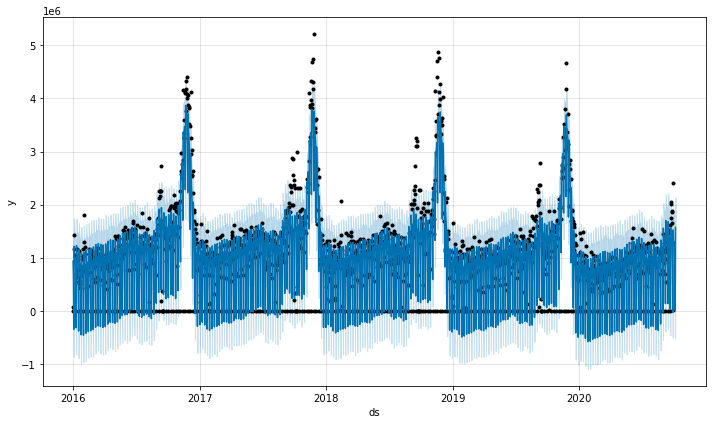

In [54]:
%matplotlib inline
m.plot(forecast);

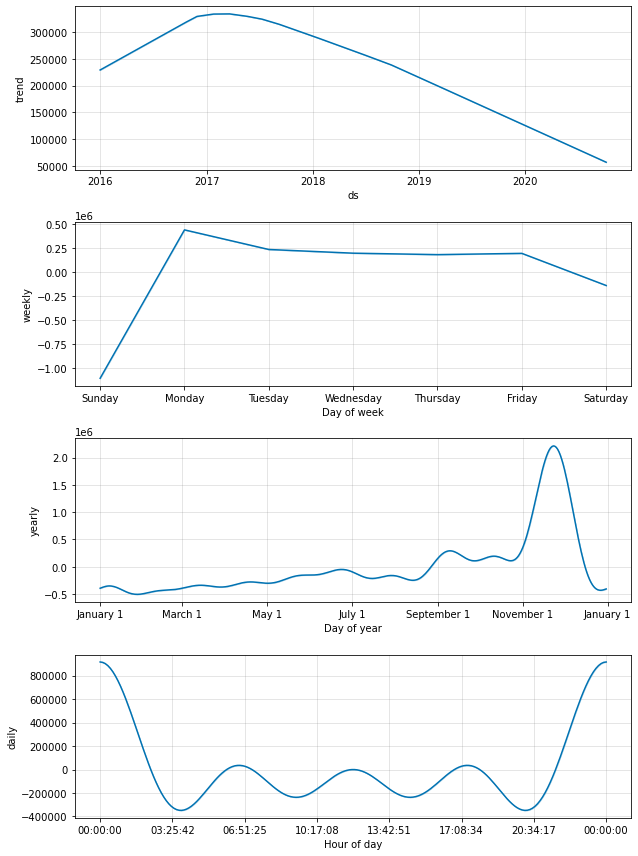

In [55]:
m.plot_components(forecast);

In [56]:
forecast = forecast.astype({'yhat':'int'})
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,4.732729e+05,1.464312e+06,938966
1,2016-01-02,1.200951e+05,1.088990e+06,613486
2,2016-01-03,-8.653575e+05,1.856977e+05,-346147
3,2016-01-04,7.263528e+05,1.746349e+06,1214730
4,2016-01-05,5.277035e+05,1.511924e+06,1017877
...,...,...,...,...
1735,2020-10-01,7.657435e+05,1.763904e+06,1280637
1736,2020-10-02,7.785371e+05,1.841689e+06,1301606
1737,2020-10-03,4.602767e+05,1.494249e+06,974405
1738,2020-10-04,-5.161716e+05,5.199137e+05,13732


In [57]:
forecast['yhat'] = forecast['yhat'].map(lambda x : 0 if x <0 else x)

In [58]:
forecast[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01,4.732729e+05,1.464312e+06,938966
1,2016-01-02,1.200951e+05,1.088990e+06,613486
2,2016-01-03,-8.653575e+05,1.856977e+05,0
3,2016-01-04,7.263528e+05,1.746349e+06,1214730
4,2016-01-05,5.277035e+05,1.511924e+06,1017877
...,...,...,...,...
1735,2020-10-01,7.657435e+05,1.763904e+06,1280637
1736,2020-10-02,7.785371e+05,1.841689e+06,1301606
1737,2020-10-03,4.602767e+05,1.494249e+06,974405
1738,2020-10-04,-5.161716e+05,5.199137e+05,13732


In [63]:
my_forecast = forecast[['ds','yhat_lower','yhat_upper','yhat']][-7:]
my_forecast.iloc[2:6,-1] = 0
my_forecast.iloc[:,-1]  = my_forecast.iloc[:,-1]/1000

In [64]:
my_forecast

,ds,yhat_lower,yhat_upper,yhat
1733,2020-09-29,8.339909e+05,1.824299e+06,1322.810
1734,2020-09-30,7.735458e+05,1.814017e+06,1289.105
1735,2020-10-01,7.657435e+05,1.763904e+06,0.000
1736,2020-10-02,7.785371e+05,1.841689e+06,0.000
1737,2020-10-03,4.602767e+05,1.494249e+06,0.000
1738,2020-10-04,-5.161716e+05,5.199137e+05,0.000
1739,2020-10-05,1.098789e+06,2.136605e+06,1574.367
